<h3> Problem Statement: Concrete Strength Prediction </h3>

<h5>Objective:</h5>

<p>To predict the concrete strength using the data available in file "concrete.csv". Apply feature engineering and model tuning to obtain a score above 85%.</p>

<h5>Resources Available: </h5>

<p>The data for this project is available in file <a href="https://archive.ics.uci.edu/ml/machine-learning-databases/concrete/compressive">https://archive.ics.uci.edu/ml/machine-learning-databases/concrete/compressive</a>. The same has been shared along with the course content.</p>

<h5>Attribute Information:</h5>
<p>Given are the variable name, variable type, the measurement unit, and a brief description. The concrete compressive strength is the regression problem. The order of this listing corresponds to the order of numerals along the rows of the database.</p>

<table>
    <thead>
        <th></th>
        <th>Name</th>
        <th>Data Type</th>
        <th>Measurement</th>
        <th>Description</th>
    </thead>
    <tbody>
        <tr>
            <td>1.</td>
            <td>Cement (cement)</td>
            <td>quantitative</td>
            <td>kg in a m3 mixture</td>
            <td>Input Variable</td>
        </tr>
         <tr>
            <td>2.</td>
            <td>Blast Furnace Slag (slag)</td>
            <td>quantitative</td>
            <td>kg in a m3 mixture</td>
             <td>Input Variable</td>
        </tr>
         <tr>
            <td>3.</td>
            <td>Fly Ash (ash)</td>
            <td>quantitative</td>
            <td>kg in a m3 mixture</td>
            <td>Input Variable</td>
        </tr>
         <tr>
            <td>4.</td>
            <td>Water(water)</td>
            <td>quantitative</td>
            <td>kg in a m3 mixture</td>
             <td>Input Variable</td>
        </tr>
         <tr>
            <td>5.</td>
            <td>Superplasticizer (superplastic)</td>
            <td>quantitative</td>
            <td>kg in a m3 mixture</td>
            <td>Input Variable</td>
        </tr>
         <tr>
            <td>6.</td>
            <td>Coarse Aggregate (coarseagg)</td>
            <td>quantitative</td>
            <td>kg in a m3 mixture</td>
            <td>Input Variable</td>
        </tr>
         <tr>
            <td>7.</td>
            <td>Fine Aggregate (fineagg)</td>
            <td>quantitative</td>
            <td>kg in a m3 mixture</td>
            <td>Input Variable</td>
        </tr>
         <tr>
            <td>8.</td>
            <td>Age(age)</td>
            <td>quantitative</td>
            <td>Day (1~365)</td>
            <td>Input Variable</td>
        </tr>
         <tr>
            <td>9.</td>
            <td>Concrete compressive strength(strength)</td>
            <td>quantitative</td>
            <td>MPa</td>
            <td>Output Variable</td>
        </tr>
    </tbody>
   </table>

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder, PolynomialFeatures
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.decomposition import PCA
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import make_pipeline

In [2]:
concrete_df = pd.read_csv('concrete.csv')
concrete_df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [3]:
concrete_df.shape

(1030, 9)

In [4]:
concrete_df.dtypes

cement          float64
slag            float64
ash             float64
water           float64
superplastic    float64
coarseagg       float64
fineagg         float64
age               int64
strength        float64
dtype: object

In [5]:
summary_df = concrete_df.describe().transpose()
summary_df['range'] = summary_df['max'] - summary_df['min']
summary_df['skeness'] = concrete_df.skew()
summary_df['median'] = concrete_df.median()
summary_df['IQR'] = concrete_df.quantile(0.75) - concrete_df.quantile(0.25)
summary_df

,count,mean,std,min,25%,50%,75%,max,range,skeness,median,IQR
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0,438.00,0.509481,272.900,157.625
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4,359.40,0.800717,22.000,142.950
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1,200.10,0.537354,0.000,118.300
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0,125.20,0.074628,185.000,27.100
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2,32.20,0.907203,6.400,10.200
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0,344.00,-0.040220,968.000,97.400
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6,398.60,-0.253010,779.500,93.050
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0,364.00,3.269177,28.000,49.000
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6,80.27,0.416977,34.445,22.425


In [6]:
concrete_df.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [7]:
#Identifying outliers
IQR = summary_df['IQR']
Q1 = concrete_df.quantile(0.25)
Q3 = concrete_df.quantile(0.75)

outlier_row_index = np.where((concrete_df< Q1 - 1.5 * IQR) | (concrete_df > Q3 + 1.5* IQR))[0]
concrete_df_outliers = concrete_df.iloc[outlier_row_index, : ]
concrete_df_outliers

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
44,531.3,0.0,0.0,141.8,28.2,852.1,893.7,91,59.20
51,331.0,0.0,0.0,192.0,0.0,978.0,825.0,180,39.00
64,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
66,237.0,92.0,71.0,247.0,6.0,853.0,695.0,28,28.63
93,427.5,47.5,0.0,228.0,0.0,932.0,594.0,180,41.84
...,...,...,...,...,...,...,...,...,...
995,380.0,0.0,0.0,228.0,0.0,932.0,670.0,365,52.52
1003,323.7,282.8,0.0,183.8,10.3,942.7,659.9,56,80.20
1017,139.6,209.4,0.0,192.0,0.0,1047.0,806.9,180,44.21
1026,531.3,0.0,0.0,141.8,28.2,852.1,893.7,3,41.30


In [8]:
((concrete_df< Q1 - 1.5 * IQR) | (concrete_df > Q3 + 1.5* IQR)).sum()

cement           0
slag             2
ash              0
water            9
superplastic    10
coarseagg        0
fineagg          5
age             59
strength         4
dtype: int64

In [9]:
concrete_df.duplicated().sum()

25

In [10]:
concrete_df.drop_duplicates(inplace=True)

In [11]:
concrete_df[concrete_df==0].count()

cement            0
slag            470
ash             541
water             0
superplastic    378
coarseagg         0
fineagg           0
age               0
strength          0
dtype: int64

`There are 470 rows with slag value as 0, 541 rows with ash value as 0 and 378 rows with superplastic as 0. We cannot consider these rows as null/missing values, as we can have concrete without adding these substances. Hence these are valid values`

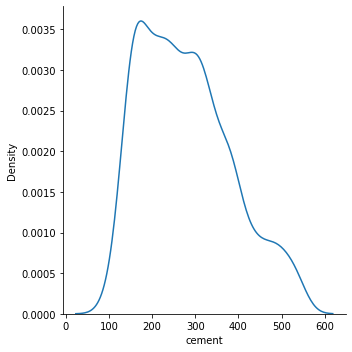

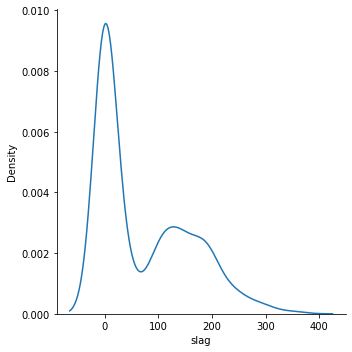

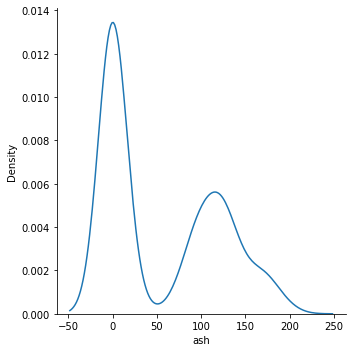

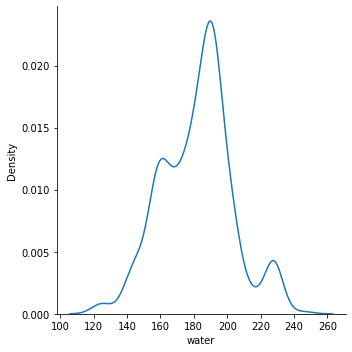

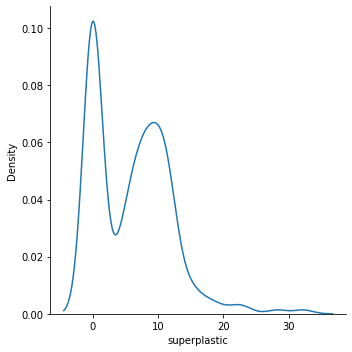

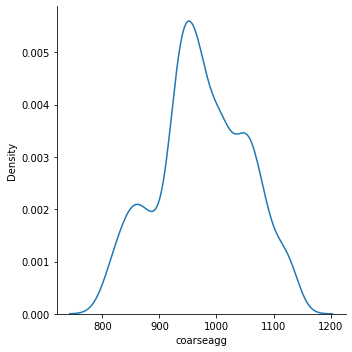

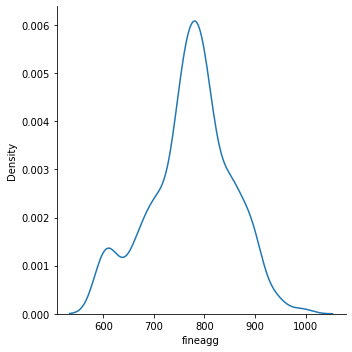

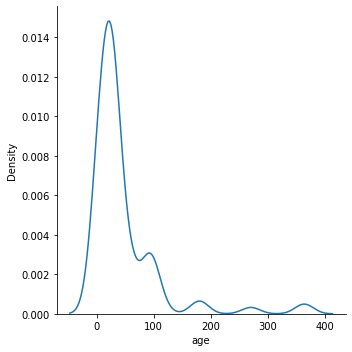

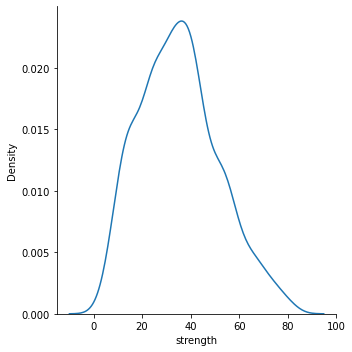

In [12]:
def plot_univariate_graphs(df):
    pos = 1
#     plt.figure(figsize=(30,20))
    for col in df.columns:
#         plt.subplot(3, 3, pos)
        sns.displot(df[col], kind='kde')
        pos += 1
        plt.show()
plot_univariate_graphs(concrete_df)

# Bivariate Analysis

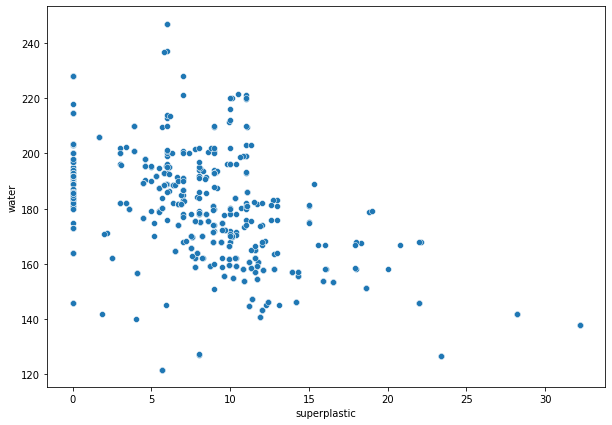

In [13]:
plt.figure(figsize=(10,7))
sns.scatterplot(x='superplastic', y='water',data=concrete_df)
plt.show()

# Insights:

1. As the content of superplastic increases, amount of water decreases

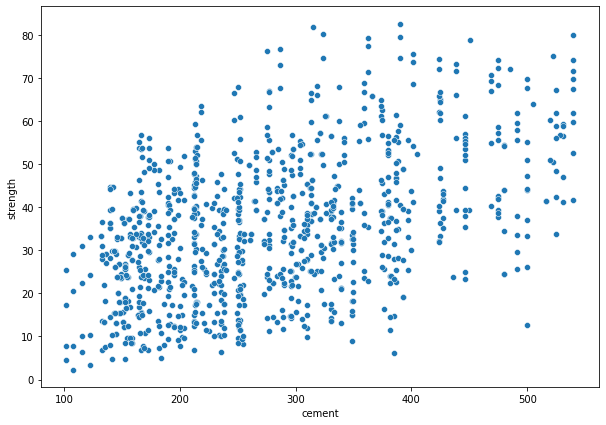

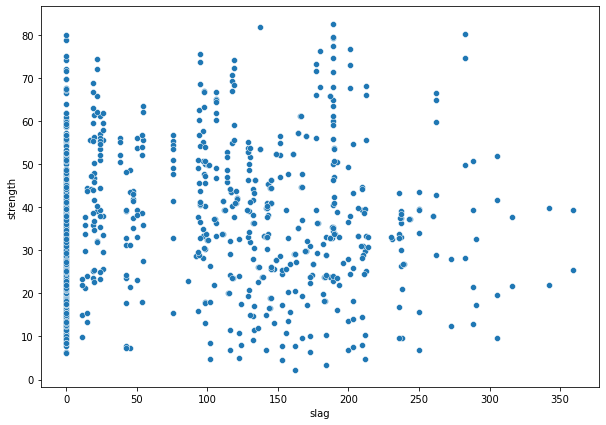

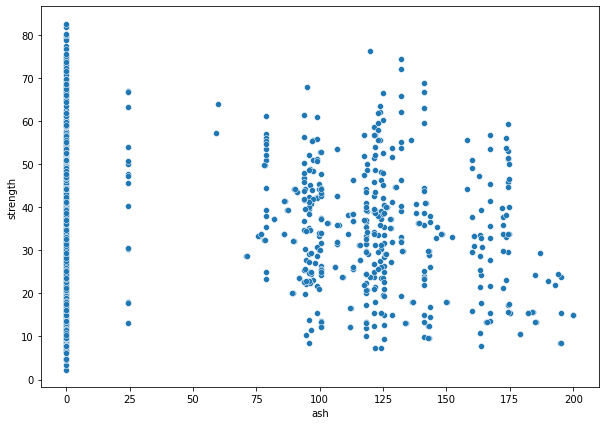

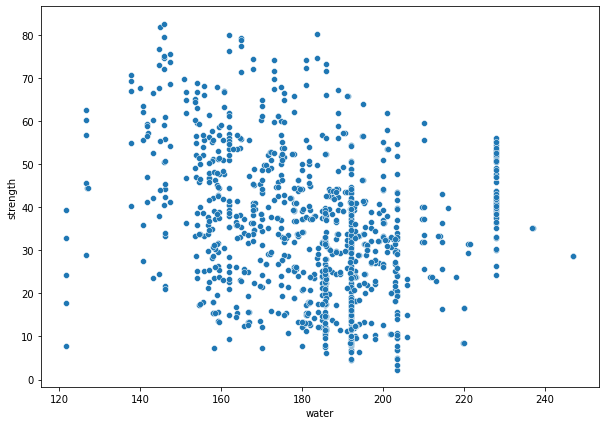

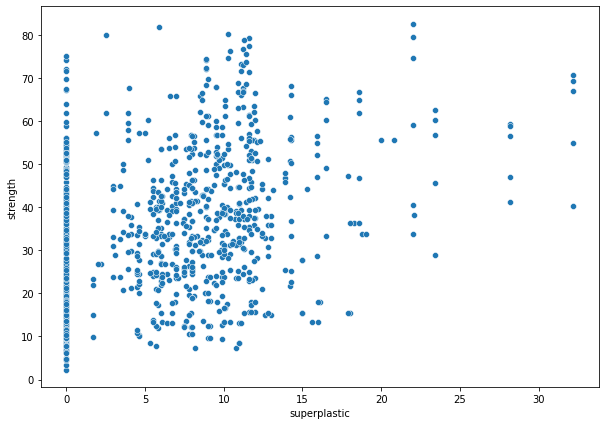

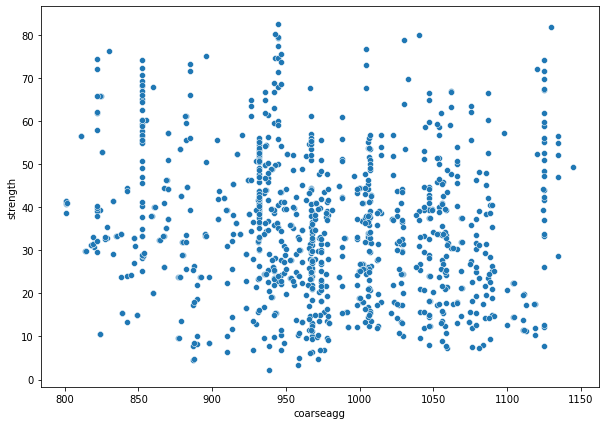

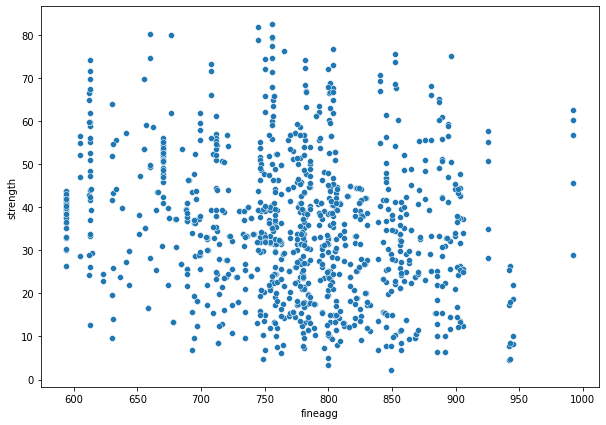

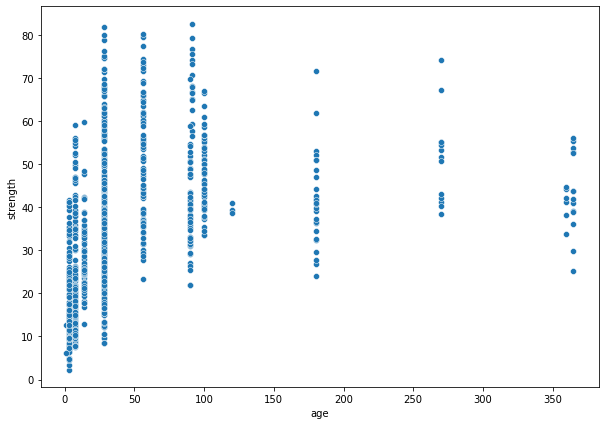

<Figure size 720x504 with 0 Axes>

In [14]:
def plot_bivariate_analysis_feature_vs_target(df):
    for col in df.columns:
        plt.figure(figsize=(10,7))
        if col == 'strength':
            continue
        sns.scatterplot(df[col], df['strength'])
        plt.show()
plot_bivariate_analysis_feature_vs_target(concrete_df)

# Insights:

1. As cement increases the concrete strength increases
2. As superplastic increases the concrete strength seems to increase as well

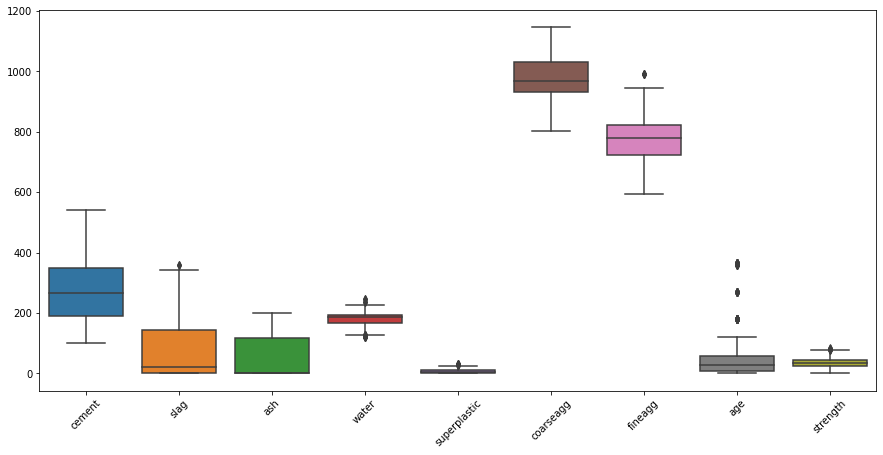

In [15]:
plt.figure(figsize=(15, 7))
sns.boxplot(data=concrete_df)
plt.xticks(rotation=45)
plt.show()

# Insights:

1. Age has more number of outliers
2. slag, water, superplastic, fineagg and strength has some outliers
3. There are no outliers in cement, ash, coarseagg

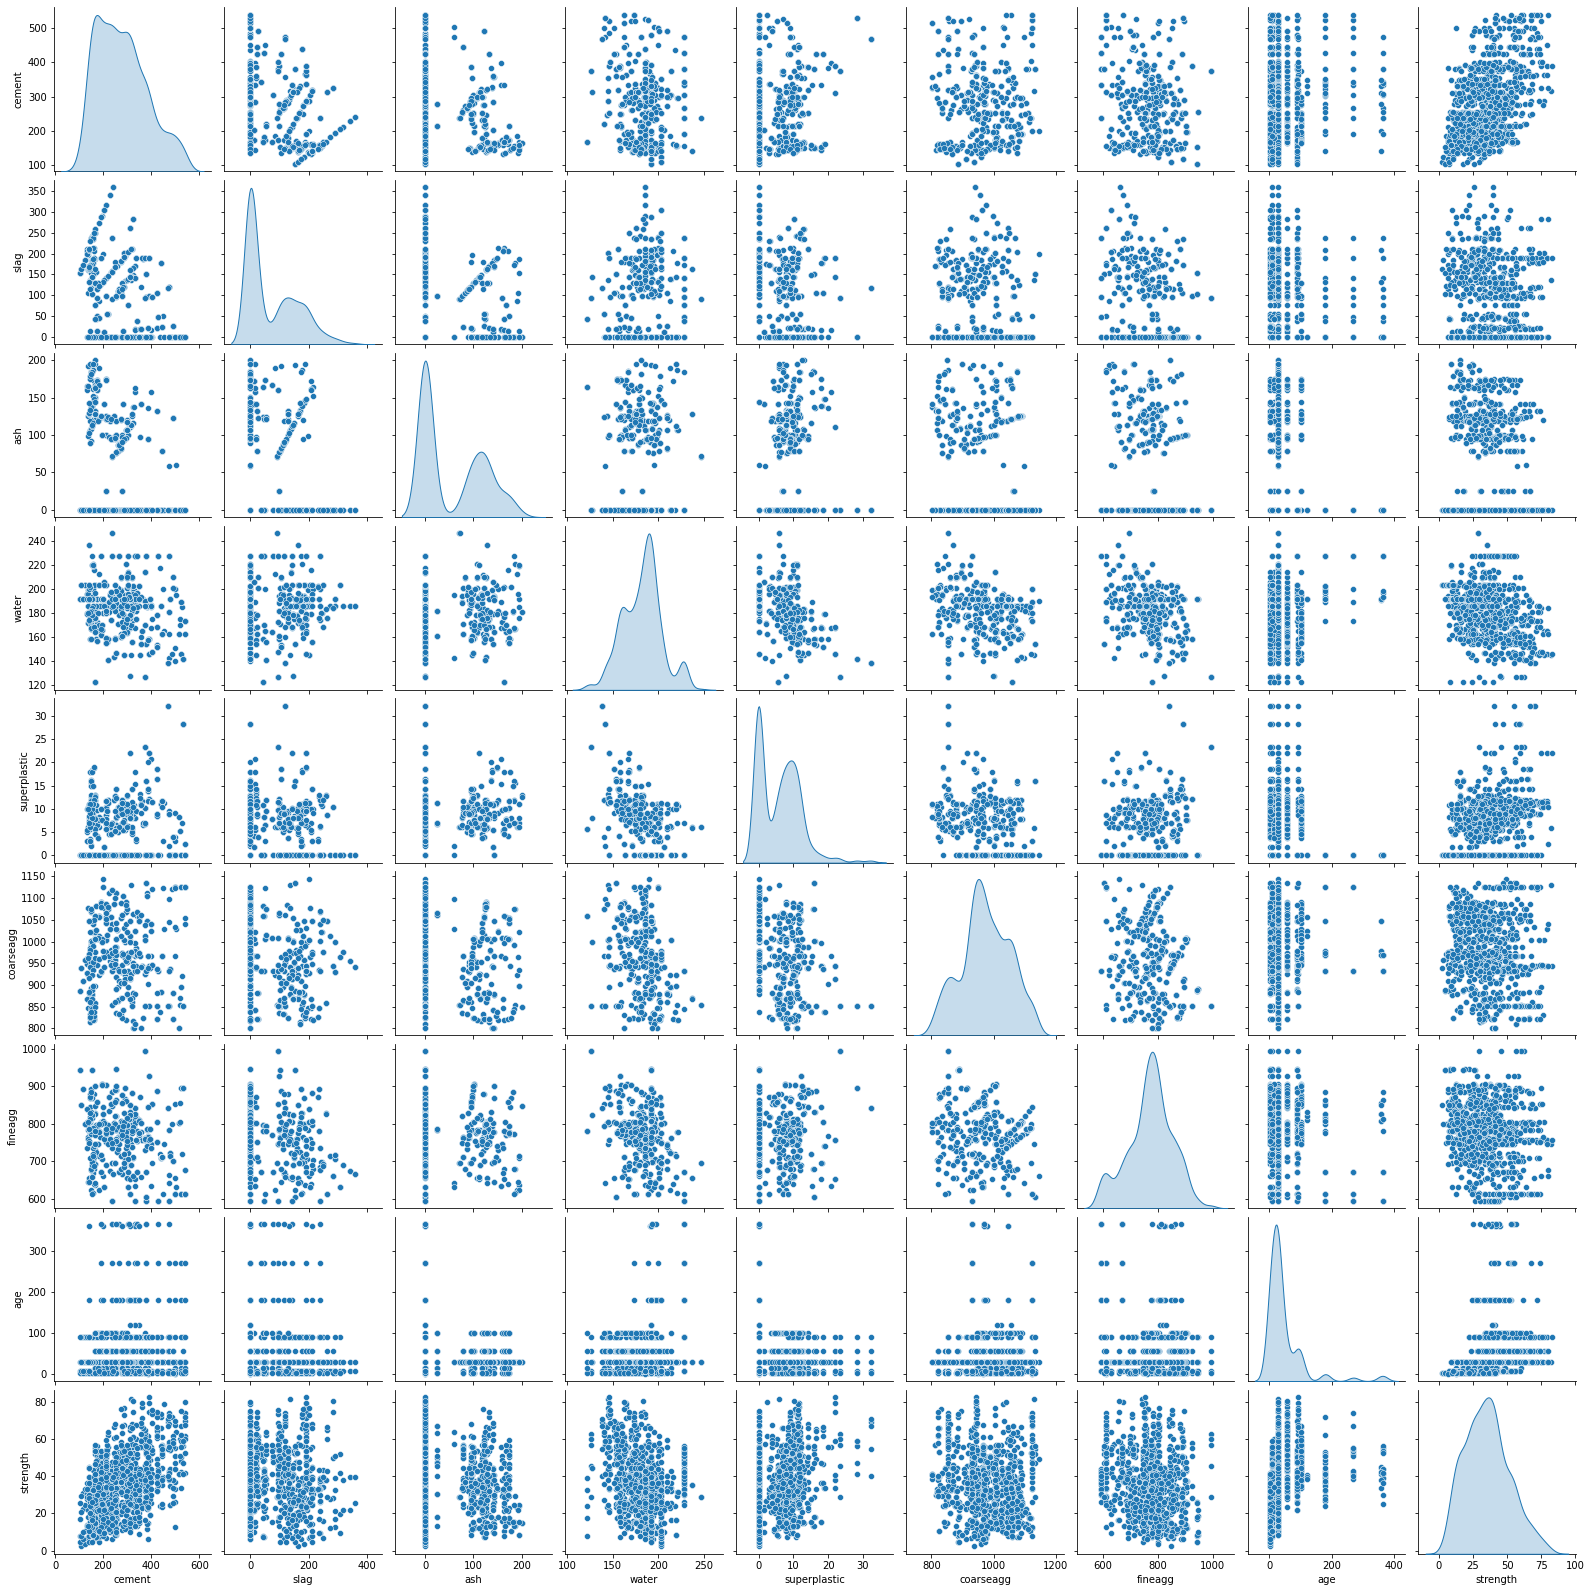

In [16]:
sns.pairplot(concrete_df, diag_kind='kde')

<AxesSubplot:>

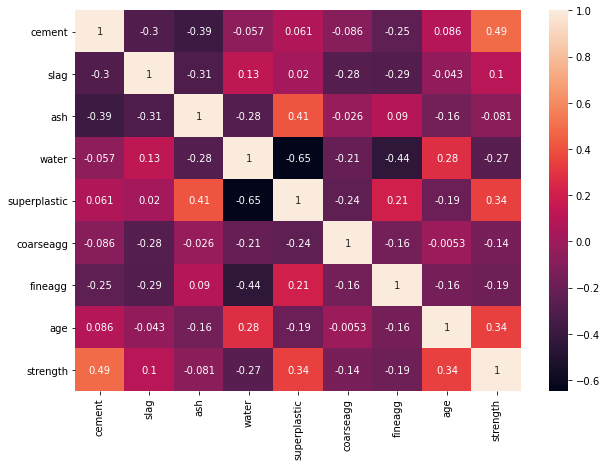

In [17]:
plt.figure(figsize=(10,7))
sns.heatmap(concrete_df.corr(), annot=True)

# Insights:

1. There is a positive correlation between cement and strength
2. There is a positive correlation between strength vs age and superplastic
3. There is a strong negative correlation between water and superplastic
4. There is a strong negative correlation between water and fineagg

# Feature Extraction

<p>As i don't have much knowledge about the concrete mixture, i am refering to the link <a href="https://www.cement.org/cement-concrete/how-concrete-is-made#:~:text=A%20properly%20designed%20mixture%20possesses,15%20to%2020%20percent%20water">concrete-mixture-proportions</a>. Concrete is a mixture of paste and aggregates, or rocks. The paste, composed of cement and water. </p>

<p> The quality of the paste  determines the character of the concrete. The strength of the paste, in turn, depends on the ratio of water to cement. The water-cement ratio is the weight of the mixing water divided by the weight of the cement. High-quality concrete is produced by lowering the water-cement ratio <p>
    
<p> Hence, creating a new features <b><i>water_to_cement_ratio</i></b> 

In [18]:
concrete_df['water_cement_ratio'] = concrete_df['water'] / concrete_df['cement']
# concrete_df['aggregate_ratio'] = concrete_df['coarseagg'] / concrete_df['fineagg']

concrete_df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,water_cement_ratio
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89,1.440198
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51,0.937241
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22,0.749600
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85,0.857143
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29,1.248708


In [19]:
# concrete_df.drop(['cement', 'water'], axis=1, inplace=True)

In [20]:
# concrete_df.head()

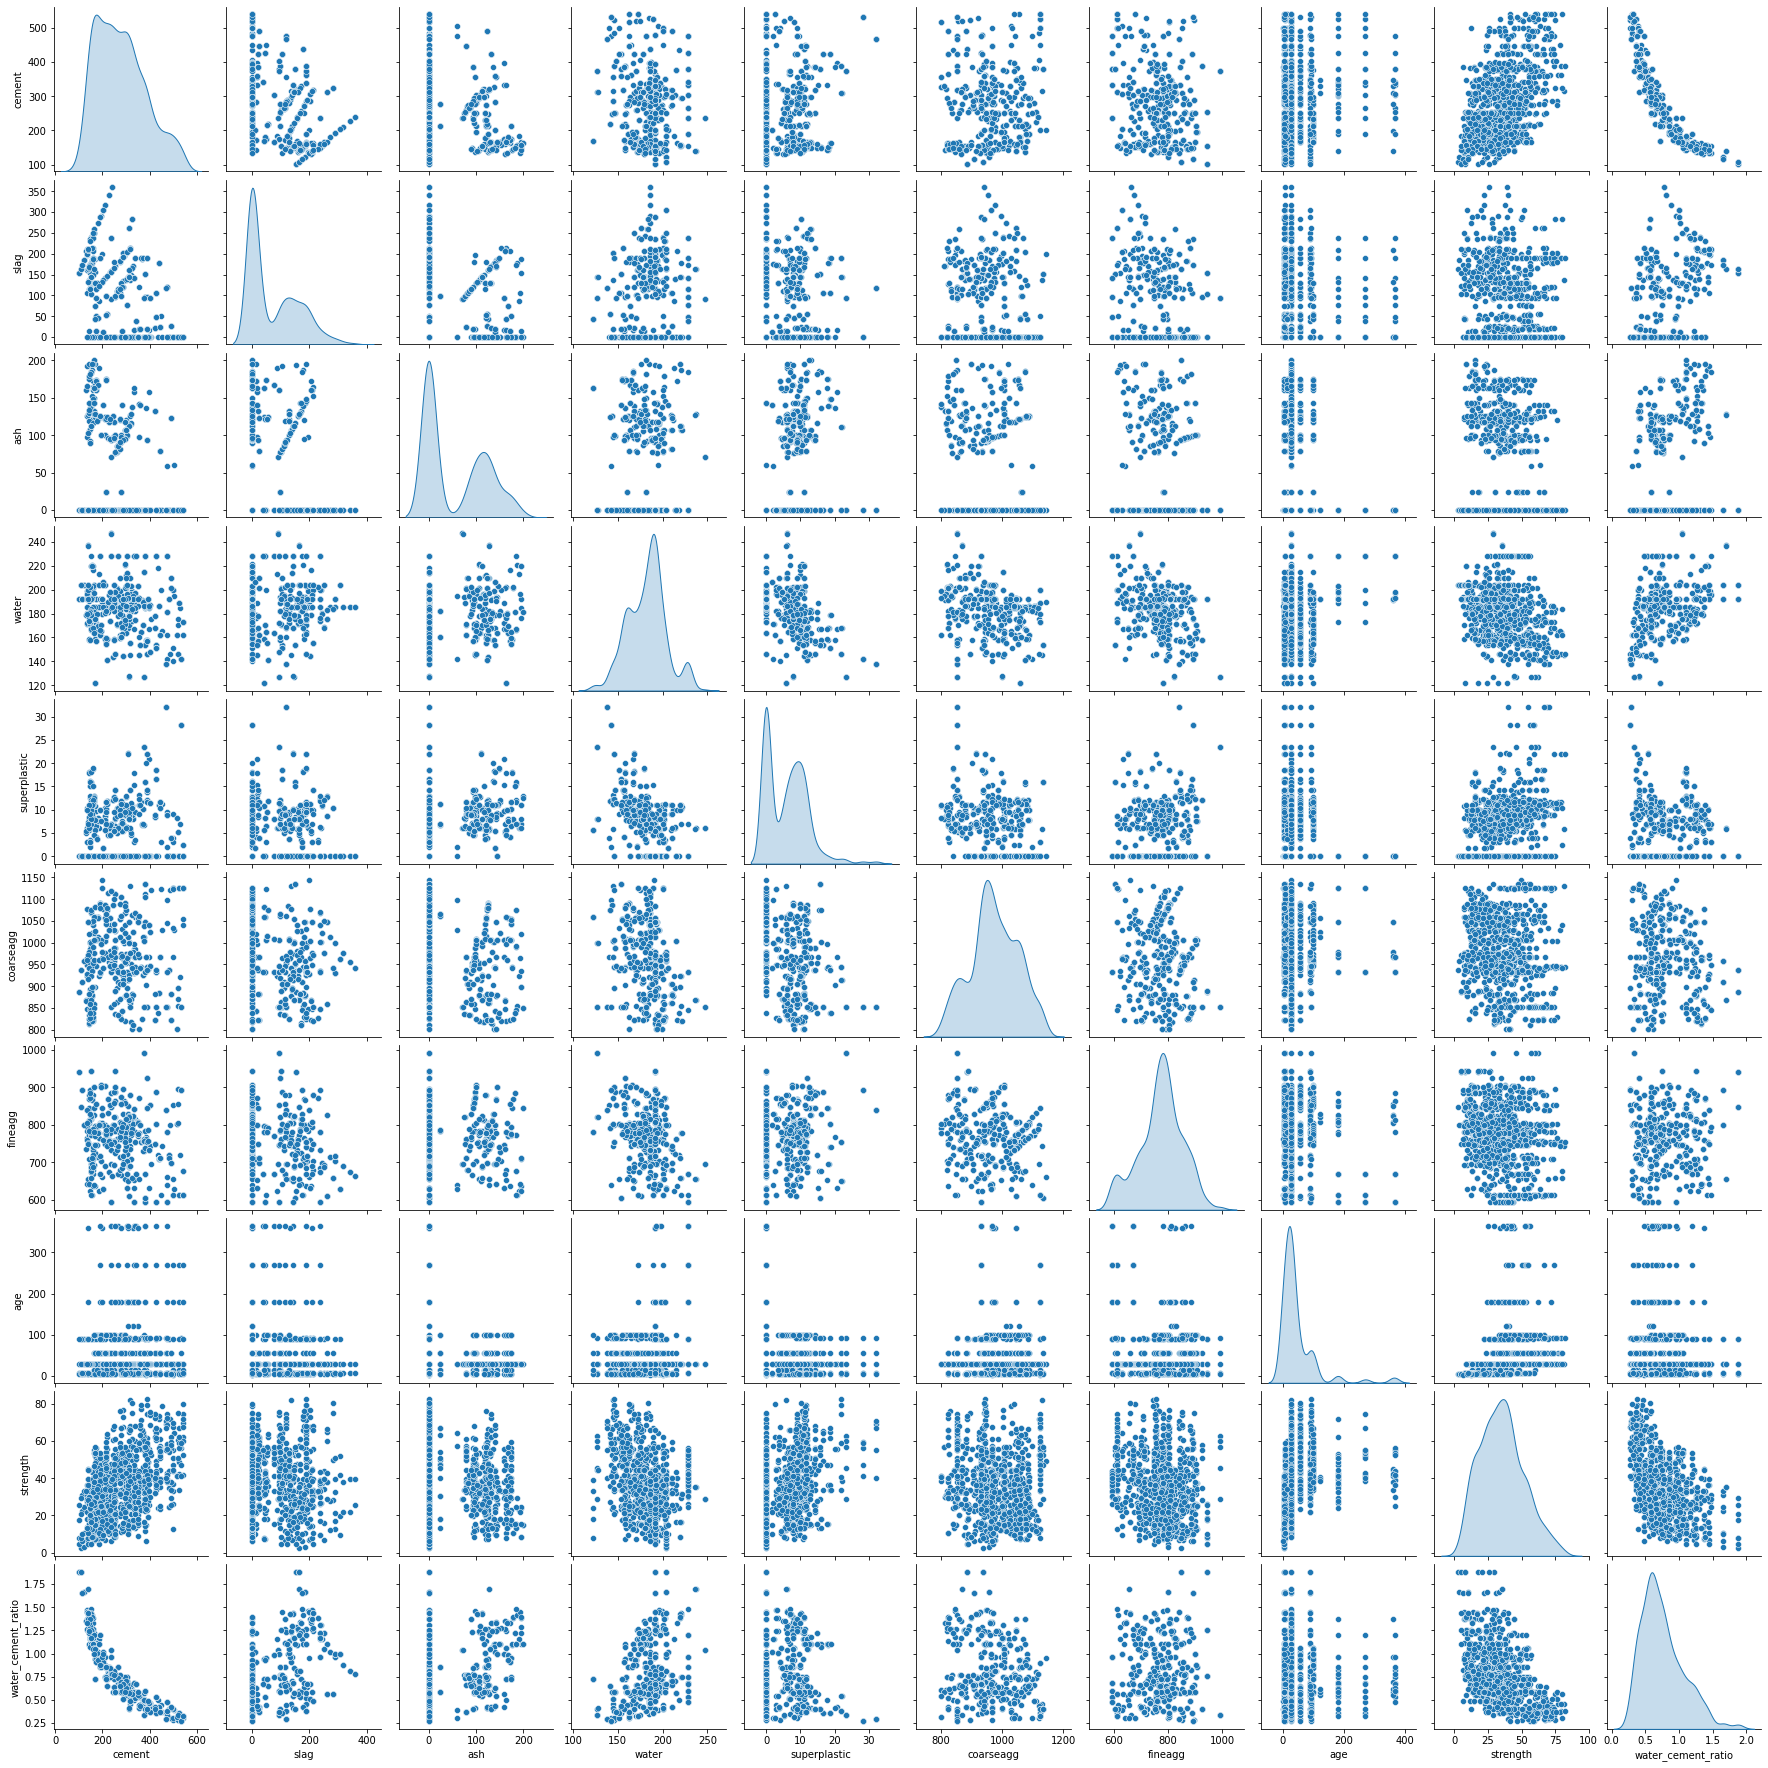

In [21]:
sns.pairplot(concrete_df, diag_kind='kde')

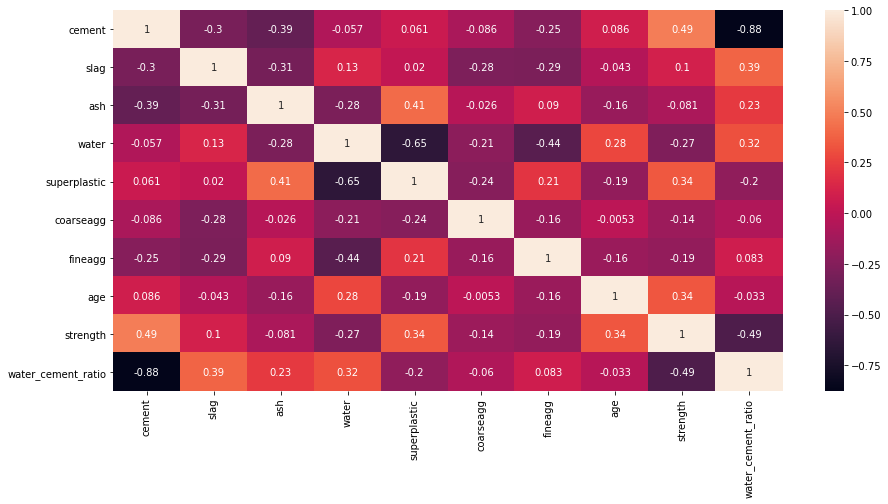

In [22]:
plt.figure(figsize=(15,7))
sns.heatmap(concrete_df.corr(), annot=True)
plt.show()

In [23]:
#split the data
X = concrete_df.drop('strength', axis=1)
y = concrete_df['strength']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=7)

In [24]:
def get_outliers(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1

    outlier_per_feature = ((df< Q1 - 1.5 * IQR) | (df > Q3 + 1.5* IQR)).sum() 
    return outlier_per_feature
outlier_per_feature = get_outliers(X_train)
outlier_per_feature

cement                 0
slag                   2
ash                    0
water                  9
superplastic           8
coarseagg              0
fineagg                4
age                   48
water_cement_ratio    16
dtype: int64

In [25]:
# Treat the outliers before fitting the model
# columns_with_outliers = ['age', 'fineagg', 'slag', 'superplastic', 'water', 'water_cement_ratio', 'aggregate_ratio']
columns_with_outliers = ['age', 'fineagg', 'slag', 'superplastic', 'water_cement_ratio', 'water']
def treat_outliers(df, columns_with_outliers, target_variable):
    if target_variable:
        q1 = df.quantile(0.25)
        q3 = df.quantile(0.75)
        iqr = q3 - q1
        upper_wisker = q3 + 1.5 * iqr
        lower_wisker = q1 - 1.5 * iqr
        #Replace the lower-end outliers with lower wisker
        df[df < lower_wisker] = lower_wisker

         #Replace the upper-end outliers with upper wisker
        df[df > upper_wisker] = upper_wisker
    else:
        for col in columns_with_outliers:
    #         print('{} : {}'.format(col, df[col]))
            q1 = df[col].quantile(0.25)
            q3 = df[col].quantile(0.75)
            iqr = q3 - q1
            upper_wisker = q3 + 1.5 * iqr
            lower_wisker = q1 - 1.5 * iqr
            #Replace the lower-end outliers with lower wisker
            df[col] = np.where(df[col] < lower_wisker, lower_wisker, df[col])

             #Replace the upper-end outliers with upper wisker
            df[col] = np.where(df[col] > upper_wisker, upper_wisker, df[col])

In [26]:
# Treat outliers in X_train
treat_outliers(X_train, columns_with_outliers, False)
outlier_per_feature = get_outliers(X_train)
outlier_per_feature

cement                0
slag                  0
ash                   0
water                 0
superplastic          0
coarseagg             0
fineagg               0
age                   0
water_cement_ratio    0
dtype: int64

In [27]:
target_outliers = get_outliers(y_train)
target_outliers

10

In [28]:
treat_outliers(y_train, None, True)
target_outliers = get_outliers(y_train)
target_outliers

0

# Simple Linear Regression

In [29]:
simple_linreg = LinearRegression()
simple_linreg.fit(X_train, y_train)

LinearRegression()

In [30]:
simple_linreg.coef_

array([ 8.41631913e-02,  9.15794866e-02,  6.93289100e-02, -1.45723770e-01,
        2.76336482e-01,  2.28964208e-03,  5.71622659e-03,  2.45766234e-01,
       -9.19444320e+00])

In [31]:
def build_linear_model_coef_df(model, features):
    coeff_df = pd.DataFrame(model.coef_, index=features, columns=['coefficients'])
    coeff_df.loc['interceptor']=[model.intercept_]
    return coeff_df

print(build_linear_model_coef_df(simple_linreg, X_train.columns))

                    coefficients
cement                  0.084163
slag                    0.091579
ash                     0.069329
water                  -0.145724
superplastic            0.276336
coarseagg               0.002290
fineagg                 0.005716
age                     0.245766
water_cement_ratio     -9.194443
interceptor            16.873562


In [32]:
def calculate_Adjusted_r2(df, r2):
    n = len(df)
    k = df.shape[1]
    adjusted_r2 = ((1-r2)*(n-1)) / (n-k-1)
    return adjusted_r2

In [33]:
result_df = pd.DataFrame(columns=['train score', 'test score', 'mean squared error', 'k-fold-cv mean', 'k-fold-cv std'])
def update_result_df_per_model(model,name, xtrain, ytrain, xtest, ytest, result_df):
    xtrain, xval, ytrain, yval = train_test_split(xtrain, ytrain, test_size=0.2, random_state=7)
    kfold = KFold(n_splits=10, shuffle=True, random_state=7)
    cv_result = cross_val_score (model, xval, yval, cv=kfold)
    train_r2 = model.score(xtrain, ytrain)
    test_r2 = model.score(xtest, ytest)
    y_predict = model.predict(xtest)
    mse = mean_squared_error(ytest, y_predict)
    
    result_df.loc[name]= [train_r2, test_r2, mse, cv_result.mean(), cv_result.std() ]
    return result_df
    

In [34]:
result_df = update_result_df_per_model(simple_linreg, 'Simple Linear Regression', X_train, y_train, X_test, y_test,
                                      result_df)
result_df

,train score,test score,mean squared error,k-fold-cv mean,k-fold-cv std
Simple Linear Regression,0.713735,0.443421,148.055005,0.692382,0.116192


In [35]:
def doPolynomialRegression(model, degree, train_x, train_y, test_x, test_y, interaction_only):
    poly = PolynomialFeatures(degree=degree, interaction_only=interaction_only)

    X_train_poly = poly.fit_transform(train_x)
    X_test_poly = poly.fit_transform(test_x)

    model.fit(X_train_poly, y_train)
    
    return X_train_poly, X_test_poly

In [67]:
interaction_only = True

polynomial_regressor = LinearRegression()

X_train_poly, X_test_poly = doPolynomialRegression(polynomial_regressor,2, X_train, y_train, X_test, y_test, 
                                                                         interaction_only)

update_result_df_per_model(polynomial_regressor, 'Linear Regression With Degree 2', X_train_poly, y_train, X_test_poly, 
                           y_test, result_df)
X_train_poly, X_test_poly = doPolynomialRegression(polynomial_regressor, 3, X_train, y_train, X_test, y_test, interaction_only)

update_result_df_per_model(polynomial_regressor, 'Linear Regression With Degree 3', X_train_poly, y_train, X_test_poly, 
                           y_test, result_df)

X_train_poly, X_test_poly = doPolynomialRegression(polynomial_regressor, 4, X_train, y_train, X_test, y_test, interaction_only)

update_result_df_per_model(polynomial_regressor, 'Linear Regression With Degree 4', X_train_poly, y_train, X_test_poly, 
                           y_test, result_df)

result_df

,train score,test score,mean squared error,k-fold-cv mean,k-fold-cv std
Simple Linear Regression,0.713735,0.443421,148.055005,0.692382,0.116192
Linear Regression With Degree 2,0.796915,0.632612,97.728364,-1.611738,2.383246
Linear Regression With Degree 3,0.858145,0.713056,76.329612,-1837.469139,5328.098611
Linear Regression With Degree 4,0.900248,0.570295,114.305209,-16666.281027,39663.089242


# Insights:

1. Since there exists non-linear relation, we should use Polynomial features. 

2. The R^2 for test data is dropped in all the models but, Polynomial features with degree 3 seems fairly better

# Regularization

In [68]:
# Ridge Regression

ridge_regressor = Ridge(alpha=.3)
ridge_regressor.fit(X_train, y_train)

update_result_df_per_model(ridge_regressor, 'Ridge Regression', X_train, y_train, X_test, y_test, result_df)

X_train_poly, X_test_poly = doPolynomialRegression(ridge_regressor,2, X_train, y_train, X_test, y_test, 
                                                                         interaction_only)

update_result_df_per_model(ridge_regressor, 'Ridge Regression With Degree 2', X_train_poly, y_train, 
                           X_test_poly, y_test, result_df)

X_train_poly, X_test_poly = doPolynomialRegression(ridge_regressor,3, X_train, y_train, X_test, y_test, 
                                                                         interaction_only)
update_result_df_per_model(ridge_regressor, 'Ridge Regression With Degree 3', X_train_poly, y_train, X_test_poly, 
                           y_test, result_df)

,train score,test score,mean squared error,k-fold-cv mean,k-fold-cv std
Simple Linear Regression,0.713735,0.443421,148.055005,0.692382,0.116192
Linear Regression With Degree 2,0.796915,0.632612,97.728364,-1.611738,2.383246
Linear Regression With Degree 3,0.858145,0.713056,76.329612,-1837.469139,5328.098611
Linear Regression With Degree 4,0.900248,0.570295,114.305209,-16666.281027,39663.089242
Ridge Regression,0.713699,0.443651,147.993818,0.693067,0.116006
Ridge Regression With Degree 2,0.796581,0.632651,97.718087,0.704878,0.086789
Ridge Regression With Degree 3,0.857930,0.737077,69.939718,-83.141473,224.605654


In [69]:
# Lasso Regression

lasso_regressor = Lasso(alpha=0.2)
lasso_regressor.fit(X_train,y_train)

update_result_df_per_model(lasso_regressor, 'Lasso Regression', X_train, y_train, X_test, y_test, result_df)

X_train_poly, X_test_poly = doPolynomialRegression(lasso_regressor,2, X_train, y_train, X_test, y_test, 
                                                                         interaction_only)
update_result_df_per_model(lasso_regressor, 'Lasso Regression With Degree 2', X_train_poly, y_train, X_test_poly, 
                           y_test, result_df)

X_train_poly, X_test_poly = doPolynomialRegression(lasso_regressor,3, X_train, y_train, X_test, y_test, 
                                                                         interaction_only)
update_result_df_per_model(lasso_regressor, 'Lasso Regression With Degree 3', X_train_poly, y_train, X_test_poly, 
                           y_test, result_df)


,train score,test score,mean squared error,k-fold-cv mean,k-fold-cv std
Simple Linear Regression,0.713735,0.443421,148.055005,0.692382,0.116192
Linear Regression With Degree 2,0.796915,0.632612,97.728364,-1.611738,2.383246
Linear Regression With Degree 3,0.858145,0.713056,76.329612,-1837.469139,5328.098611
Linear Regression With Degree 4,0.900248,0.570295,114.305209,-16666.281027,39663.089242
Ridge Regression,0.713699,0.443651,147.993818,0.693067,0.116006
Ridge Regression With Degree 2,0.796581,0.632651,97.718087,0.704878,0.086789
Ridge Regression With Degree 3,0.857930,0.737077,69.939718,-83.141473,224.605654
Lasso Regression,0.709297,0.447063,147.086103,0.695746,0.115628
Lasso Regression With Degree 2,0.792413,0.587518,109.723879,0.730164,0.065771
Lasso Regression With Degree 3,0.824860,0.689756,82.527728,0.544247,0.161294


In [70]:
def PolynomialFeatures_labeled(input_df,power):
    poly = pp.PolynomialFeatures(power)
    output_nparray = poly.fit_transform(input_df)
    powers_nparray = poly.powers_

    input_feature_names = list(input_df.columns)
    target_feature_names = ["Constant Term"]
    for feature_distillation in powers_nparray[1:]:
        intermediary_label = ""
        final_label = ""
        for i in range(len(input_feature_names)):
            if feature_distillation[i] == 0:
                continue
            else:
                variable = input_feature_names[i]
                power = feature_distillation[i]
                intermediary_label = "%s^%d" % (variable,power)
                if final_label == "":         #If the final label isn't yet specified
                    final_label = intermediary_label
                else:
                    final_label = final_label + " x " + intermediary_label
        target_feature_names.append(final_label)
    output_df = pd.DataFrame(output_nparray, columns = target_feature_names)
    return output_df

In [71]:
poly = PolynomialFeatures(degree=3, interaction_only=True)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)


In [72]:
dTree = DecisionTreeRegressor(criterion='mse', random_state=7)
dTree.fit(X_train_poly, y_train)

DecisionTreeRegressor(random_state=7)

In [73]:
update_result_df_per_model(dTree, 'Decision Tree', X_train_poly, y_train, X_test_poly, 
                           y_test, result_df)
result_df

,train score,test score,mean squared error,k-fold-cv mean,k-fold-cv std
Simple Linear Regression,0.713735,0.443421,148.055005,0.692382,0.116192
Linear Regression With Degree 2,0.796915,0.632612,97.728364,-1.611738,2.383246
Linear Regression With Degree 3,0.858145,0.713056,76.329612,-1837.469139,5328.098611
Linear Regression With Degree 4,0.900248,0.570295,114.305209,-16666.281027,39663.089242
Ridge Regression,0.713699,0.443651,147.993818,0.693067,0.116006
Ridge Regression With Degree 2,0.796581,0.632651,97.718087,0.704878,0.086789
Ridge Regression With Degree 3,0.857930,0.737077,69.939718,-83.141473,224.605654
Lasso Regression,0.709297,0.447063,147.086103,0.695746,0.115628
Lasso Regression With Degree 2,0.792413,0.587518,109.723879,0.730164,0.065771
Lasso Regression With Degree 3,0.824860,0.689756,82.527728,0.544247,0.161294


In [74]:
dTree_pruned = DecisionTreeRegressor(criterion='mse', random_state=7, max_depth=4)
dTree_pruned.fit(X_train_poly, y_train)

update_result_df_per_model(dTree_pruned, 'Decision Tree With Max depth 4', X_train_poly, y_train, X_test_poly, 
                           y_test, result_df)
result_df

,train score,test score,mean squared error,k-fold-cv mean,k-fold-cv std
Simple Linear Regression,0.713735,0.443421,148.055005,0.692382,0.116192
Linear Regression With Degree 2,0.796915,0.632612,97.728364,-1.611738,2.383246
Linear Regression With Degree 3,0.858145,0.713056,76.329612,-1837.469139,5328.098611
Linear Regression With Degree 4,0.900248,0.570295,114.305209,-16666.281027,39663.089242
Ridge Regression,0.713699,0.443651,147.993818,0.693067,0.116006
Ridge Regression With Degree 2,0.796581,0.632651,97.718087,0.704878,0.086789
Ridge Regression With Degree 3,0.857930,0.737077,69.939718,-83.141473,224.605654
Lasso Regression,0.709297,0.447063,147.086103,0.695746,0.115628
Lasso Regression With Degree 2,0.792413,0.587518,109.723879,0.730164,0.065771
Lasso Regression With Degree 3,0.824860,0.689756,82.527728,0.544247,0.161294


In [75]:
bagging_regressor = BaggingRegressor(base_estimator=dTree_pruned, n_estimators=50, n_jobs=4, random_state=7)
bagging_regressor.fit(X_train_poly, y_train)

update_result_df_per_model(bagging_regressor, 'Bagging Regressor', X_train_poly, y_train, X_test_poly, 
                           y_test, result_df)
result_df

,train score,test score,mean squared error,k-fold-cv mean,k-fold-cv std
Simple Linear Regression,0.713735,0.443421,148.055005,0.692382,0.116192
Linear Regression With Degree 2,0.796915,0.632612,97.728364,-1.611738,2.383246
Linear Regression With Degree 3,0.858145,0.713056,76.329612,-1837.469139,5328.098611
Linear Regression With Degree 4,0.900248,0.570295,114.305209,-16666.281027,39663.089242
Ridge Regression,0.713699,0.443651,147.993818,0.693067,0.116006
Ridge Regression With Degree 2,0.796581,0.632651,97.718087,0.704878,0.086789
Ridge Regression With Degree 3,0.857930,0.737077,69.939718,-83.141473,224.605654
Lasso Regression,0.709297,0.447063,147.086103,0.695746,0.115628
Lasso Regression With Degree 2,0.792413,0.587518,109.723879,0.730164,0.065771
Lasso Regression With Degree 3,0.824860,0.689756,82.527728,0.544247,0.161294


In [76]:
adaboost_regressor = AdaBoostRegressor(base_estimator=dTree_pruned, n_estimators=100, learning_rate=0.1, random_state=7)
adaboost_regressor.fit(X_train_poly, y_train)

update_result_df_per_model(adaboost_regressor, 'Adaboost Regressor', X_train_poly, y_train, X_test_poly, 
                           y_test, result_df)
result_df

,train score,test score,mean squared error,k-fold-cv mean,k-fold-cv std
Simple Linear Regression,0.713735,0.443421,148.055005,0.692382,0.116192
Linear Regression With Degree 2,0.796915,0.632612,97.728364,-1.611738,2.383246
Linear Regression With Degree 3,0.858145,0.713056,76.329612,-1837.469139,5328.098611
Linear Regression With Degree 4,0.900248,0.570295,114.305209,-16666.281027,39663.089242
Ridge Regression,0.713699,0.443651,147.993818,0.693067,0.116006
Ridge Regression With Degree 2,0.796581,0.632651,97.718087,0.704878,0.086789
Ridge Regression With Degree 3,0.857930,0.737077,69.939718,-83.141473,224.605654
Lasso Regression,0.709297,0.447063,147.086103,0.695746,0.115628
Lasso Regression With Degree 2,0.792413,0.587518,109.723879,0.730164,0.065771
Lasso Regression With Degree 3,0.824860,0.689756,82.527728,0.544247,0.161294


In [77]:
gradientboost_regressor = GradientBoostingRegressor( max_depth=4, learning_rate=0.1, random_state=7)
gradientboost_regressor.fit(X_train_poly, y_train)

update_result_df_per_model(gradientboost_regressor, 'Gradientboost Regressor', X_train_poly, y_train, X_test_poly, 
                           y_test, result_df)
result_df

,train score,test score,mean squared error,k-fold-cv mean,k-fold-cv std
Simple Linear Regression,0.713735,0.443421,148.055005,0.692382,0.116192
Linear Regression With Degree 2,0.796915,0.632612,97.728364,-1.611738,2.383246
Linear Regression With Degree 3,0.858145,0.713056,76.329612,-1837.469139,5328.098611
Linear Regression With Degree 4,0.900248,0.570295,114.305209,-16666.281027,39663.089242
Ridge Regression,0.713699,0.443651,147.993818,0.693067,0.116006
Ridge Regression With Degree 2,0.796581,0.632651,97.718087,0.704878,0.086789
Ridge Regression With Degree 3,0.857930,0.737077,69.939718,-83.141473,224.605654
Lasso Regression,0.709297,0.447063,147.086103,0.695746,0.115628
Lasso Regression With Degree 2,0.792413,0.587518,109.723879,0.730164,0.065771
Lasso Regression With Degree 3,0.824860,0.689756,82.527728,0.544247,0.161294


In [78]:
random_forest_regressor = RandomForestRegressor( max_depth=4, random_state=7)
random_forest_regressor.fit(X_train_poly, y_train)

update_result_df_per_model(random_forest_regressor, 'Random Forest', X_train_poly, y_train, X_test_poly, y_test,
                           result_df)
result_df

,train score,test score,mean squared error,k-fold-cv mean,k-fold-cv std
Simple Linear Regression,0.713735,0.443421,148.055005,0.692382,0.116192
Linear Regression With Degree 2,0.796915,0.632612,97.728364,-1.611738,2.383246
Linear Regression With Degree 3,0.858145,0.713056,76.329612,-1837.469139,5328.098611
Linear Regression With Degree 4,0.900248,0.570295,114.305209,-16666.281027,39663.089242
Ridge Regression,0.713699,0.443651,147.993818,0.693067,0.116006
Ridge Regression With Degree 2,0.796581,0.632651,97.718087,0.704878,0.086789
Ridge Regression With Degree 3,0.857930,0.737077,69.939718,-83.141473,224.605654
Lasso Regression,0.709297,0.447063,147.086103,0.695746,0.115628
Lasso Regression With Degree 2,0.792413,0.587518,109.723879,0.730164,0.065771
Lasso Regression With Degree 3,0.824860,0.689756,82.527728,0.544247,0.161294


In [97]:
result_df = pd.DataFrame(columns=['train score', 'test score', 'mean squared error', 'k-fold-cv mean', 'k-fold-cv std'])
def evaluate_models(model_list):  
    
    kfold = KFold(n_splits=10, shuffle=True, random_state=7)
    
    for model_obj in model_list:
        model_instance = model_obj['model']
        xtrain = model_obj['xtrain']
        ytrain = model_obj['ytrain']
        xtest = model_obj['xtest']
        ytest = model_obj['ytest']
        
        xtrain, xval, ytrain, yval = train_test_split(xtrain, ytrain, test_size=0.2, random_state=7)
        
        model_instance.fit(xtrain, ytrain)
        
        cv_result = cross_val_score (model_instance, xval, yval, cv=kfold)
        
        train_r2 = model_instance.score(xtrain, ytrain)
        test_r2 = model_instance.score(xtest, ytest)
        
        y_predict = model_instance.predict(xtest)
        mse = mean_squared_error(ytest, y_predict)
        
        print(r2_score(ytest, y_predict))

        result_df.loc[model_obj['name']]= [train_r2, test_r2, mse, cv_result.mean(), cv_result.std() ]

    return result_df
        

In [98]:
def get_list_of_models(X_train, y_train, X_test, y_test):
    dTree = DecisionTreeRegressor(criterion='mse', random_state=7)
    
    poly = PolynomialFeatures(degree=3, interaction_only=True)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.fit_transform(X_test)
    
    model_list = [
        {'model': Ridge(alpha=.3), 'name': 'Ridge Regression With Degree 3',
                 'xtrain': X_train_poly, 'ytrain': y_train, 'xtest': X_test_poly, 'ytest': y_test },
        {'model': Lasso(alpha=0.2), 'name': 'Lasso Regression With Degree 3',
                 'xtrain': X_train_poly, 'ytrain': y_train, 'xtest': X_test_poly, 'ytest': y_test },
        {'model': dTree, 'name': 'Decision Tree Regressor',
                 'xtrain': X_train, 'ytrain': y_train, 'xtest': X_test, 'ytest': y_test },
        {'model': BaggingRegressor(base_estimator=dTree, n_jobs=4, random_state=7), 'name': 'Bagging Regressor', 
                 'xtrain': X_train, 'ytrain': y_train, 'xtest': X_test, 'ytest': y_test },
        {'model': AdaBoostRegressor(base_estimator=dTree, random_state=7), 'name': 'AdaBoost Regressor', 
                 'xtrain': X_train, 'ytrain': y_train, 'xtest': X_test, 'ytest': y_test },
        {'model': GradientBoostingRegressor(random_state=7), 'name': 'GradientBoost Regressor', 
                 'xtrain': X_train, 'ytrain': y_train, 'xtest': X_test, 'ytest': y_test },
        {'model': RandomForestRegressor( max_depth=4, random_state=7), 'name': 'RandomForest Regressor', 
                 'xtrain': X_train, 'ytrain': y_train, 'xtest': X_test, 'ytest': y_test }
    ]
    
    return model_list

In [99]:
result_df = evaluate_models(get_list_of_models(X_train, y_train, X_test, y_test))

result_df

0.712457604095589
0.6503039439872778
0.8686873911325277
0.9014491759391497
0.911170355847554
0.9201571791506157
0.7842613870757409


,train score,test score,mean squared error,k-fold-cv mean,k-fold-cv std
Ridge Regression With Degree 3,0.867240,0.712458,76.488806,-83.141473,224.605654
Lasso Regression With Degree 3,0.830177,0.650304,93.022226,0.544247,0.161294
Decision Tree Regressor,0.995247,0.868687,34.930309,0.522861,0.200372
Bagging Regressor,0.974626,0.901449,26.215386,0.730895,0.083083
AdaBoost Regressor,0.992225,0.911170,23.629466,0.740862,0.089454
GradientBoost Regressor,0.949562,0.920157,21.238892,0.813238,0.065020
RandomForest Regressor,0.832028,0.784261,57.388368,0.675665,0.079386
